# Prepare a model for glass classification using KNN.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
data.shape

(214, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
x=data.iloc[:,0:9]
y=data.iloc[:,-1]

In [12]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [14]:
n_neighbors=list(range(1,41))  
parameters={'n_neighbors':n_neighbors}

In [15]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [17]:
model1=KNeighborsClassifier(n_neighbors=1)  

In [18]:
model1.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [19]:
kfold=KFold(n_splits=10)
results=cross_val_score(model1,x,y,cv=kfold)

In [20]:
results

array([0.5       , 0.59090909, 0.5       , 0.81818182, 0.38095238,
       0.66666667, 0.42857143, 0.47619048, 0.28571429, 0.95238095])

In [21]:
results.mean()

0.5599567099567099

In [22]:
k_range=range(1,41)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())

In [23]:
k_scores

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124,
 0.5937984496124031,
 0.5891472868217054,
 0.5985603543743079,
 0.6032115171650055,
 0.6171650055370985,
 0.6032115171650055,
 0.6078626799557032,
 0.626467331118494,
 0.626467331118494,
 0.6218161683277963,
 0.6171650055370985,
 0.6031007751937983,
 0.6031007751937983,
 0.5890365448504984,
 0.5890365448504984,
 0.5842746400885936,
 0.5936877076411959,
 0.5935769656699889,
 0.5890365448504983,
 0.5843853820598006,
 0.5796234772978959,
 0.5842746400885935,
 0.5841638981173864,
 0.5702104097452934,
 0.5700996677740863,
 0.5653377630121815,
 0.5606866002214839,
 0.5653377630121815,
 0.5653377630121816,
 0.5702104097452934,
 0.5513842746400887]

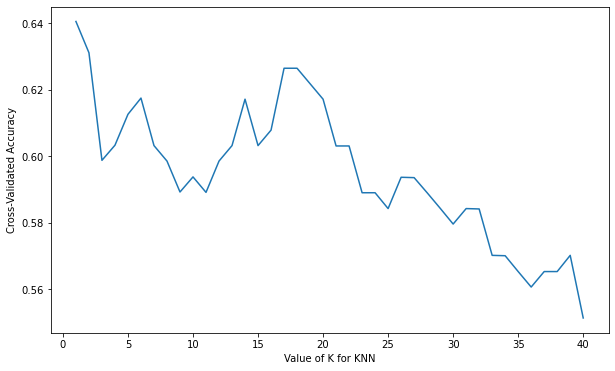

In [24]:
plt.figure(figsize=(10,6))
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [25]:
df_accuracy=pd.DataFrame({'Value of k':range(1,41),
                         'Accuracy':k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.640532
1,2,0.631118
2,3,0.598782
3,4,0.603322
4,5,0.612625
5,6,0.617497
6,7,0.603212
7,8,0.598560
8,9,0.589258
9,10,0.593798
